In [1]:
import numpy as np
import pandas as pd 
import plotly.graph_objects as go
import matplotlib.pyplot as plt 
from scipy.ndimage import gaussian_filter1d
from scipy.signal import butter,filtfilt
import pywt
import scipy as sci 
from scipy import signal
from scipy.spatial.transform import Rotation as R
from scipy.interpolate import interp1d

In [2]:
def fig_from_df(df,col):
    fig = go.Figure()
    for col in df.columns:
      fig.add_trace(go.Scatter(x=df.index,y=df[col],name=col))
    return fig
    

# Butterworth function
def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

In [3]:
A=pd.read_csv(r'F:\uni\M\ms\project\data\Modelling-Course--main\modelling course\yasaman\walk2.csv')
A

SensorId   TimeStamp (s)   FrameNumber   AccX (g)   AccY (g)   AccZ (g)  \
0            1         -0.0001             0  -0.033434  -0.981208  -0.306275   
1            1          0.0099             1  -0.034122  -0.981228  -0.301729   
2            1          0.0199             2  -0.034149  -0.978983  -0.299067   
3            1          0.0299             3  -0.026693  -0.967766  -0.297798   
4            1          0.0399             4  -0.017923  -0.958047  -0.298925   
...        ...             ...           ...        ...        ...        ...   
1604         1         16.0599          1604  -0.009688  -0.965474  -0.303719   
1605         1         16.0699          1605  -0.010233  -0.962777  -0.299213   
1606         1         16.0799          1606  -0.014200  -0.962996  -0.290827   
1607         1         16.0899          1607  -0.018364  -0.961772  -0.291079   
1608         1         16.0999          1608  -0.017520  -0.962051  -0.287995   

       GyroX (deg/s)   GyroY (deg/s)   GyroZ (deg/s)   MagX (uT)  ...  \
0           0.117102       12.057414        3.469415   13.648824  ...   
1           0.422762       13.426724        3.831255   13.685390  ...   
2           0.104234       14.604434        4.067930   13.758515  ...   
3          -0.089103       15.765407        4.339026   13.758515  ...   
4          -0.099261       16.100151        4.855865   13.941339  ...   
...              ...             ...             ...         ...  ...   
1604       -3.572402       -2.121185       -3.321357  -25.877394  ...   
1605       -2.720584       -2.402344       -2.503694  -26.133345  ...   
1606       -1.095850       -2.935319       -1.658534  -25.584875  ...   
1607       -0.244419       -2.904862       -1.010101  -25.731133  ...   
1608        0.307309       -3.252153       -0.491742  -25.731133  ...   

         QuatX     QuatY     QuatZ   LinAccX (g)   LinAccY (g)   LinAccZ (g)  \
0     0.009034  0.000325 -0.050556      0.033664      0.999305     -0.693561   
1     0.008988  0.000280 -0.051772      0.034448      0.999246     -0.698108   
2     0.008969  0.000224 -0.053092      0.034604      0.996930     -0.700772   
3     0.008967  0.000160 -0.054515      0.027291      0.985697     -0.702041   
4     0.008983  0.000174 -0.055679      0.018616      0.975976     -0.700914   
...        ...       ...       ...           ...           ...           ...   
1604  0.018050 -0.009959  0.035818      0.028147      1.002026     -0.695443   
1605  0.018287 -0.010108  0.036081      0.029026      0.999888     -0.699921   
1606  0.018386 -0.010168  0.036368      0.033154      1.000416     -0.708293   
1607  0.017175 -0.008678  0.036654      0.036628      0.998648     -0.708072   
1608  0.017155 -0.008629  0.036937      0.033544      0.996988     -0.711266   

       Pressure (kPa)   Altitude (m)   Temperature (degC)   HeaveMotion (m)  
0           87.605003    1210.349365            40.110001               0.0  
1           87.605003    1210.349365            40.110001               0.0  
2           87.605003    1210.349365            40.110001               0.0  
3           87.605003    1210.349365            40.110001               0.0  
4           87.605003    1210.349365            40.110001               0.0  
...               ...            ...                  ...               ...  
1604        87.604004    1210.442993            40.369999               0.0  
1605        87.604004    1210.442993            40.369999               0.0  
1606        87.604004    1210.442993            40.369999               0.0  
1607        87.604004    1210.442993            40.369999               0.0  
1608        87.604004    1210.442993            40.369999               0.0  

[1609 rows x 26 columns]

In [10]:
#define data : acceleration raw data, processed data including linear acceleration, quaternion and euler
L = 300  #L is the initial of the walk which is after 3 seconds
H = len(A) - 100   #H is the end of the walk, at least 1 second of standing still at the end 
accelx=np.array(A[' AccX (g)'][L:H])
accely=np.array(A[' AccY (g)'][L:H])
accelz=np.array(A[' AccZ (g)'][L:H])
magx=np.array(A[' MagX (uT)'][L:H])
magy=np.array(A[' MagY (uT)'][L:H])
magz=np.array(A[' MagZ (uT)'][L:H])
t=np.array(A[' TimeStamp (s)'][L:H])
q1=np.array(A[' QuatW'][L:H])
q2=np.array(A[' QuatX'][L:H])
q3=np.array(A[' QuatY'][L:H])
q4=np.array(A[' QuatZ'][L:H])
linaccelx=np.array(A[' LinAccX (g)'][L:H])
linaccely=np.array(A[' LinAccY (g)'][L:H])
linaccelz=np.array(A[' LinAccZ (g)'][L:H])
eulerx=np.array(A[' EulerX (deg)'][L:H])
eulery=np.array(A[' EulerY (deg)'][L:H])
eulerz=np.array(A[' EulerZ (deg)'][L:H])
angular_velx=np.array(A[' GyroX (deg/s)'][L:H])
angular_vely=np.array(A[' GyroY (deg/s)'][L:H])
angular_velz=np.array(A[' GyroZ (deg/s)'][L:H])


Quat = [q1,q2,q3,q4]
Quat_array = np.stack([q1,q2,q3,q4],axis = 1)


gyr_t=[angular_velx,angular_vely,angular_velz]
gyr_arrey = np.stack([angular_velx,angular_vely,angular_velz], axis=1)


acc_t=[t,accelx,accely,accelz]
acc_arrey = np.stack([accelx,accely,accelz], axis=1)

In [5]:
fig = fig_from_df(A,' AccZ (g) ')
fig.write_html('time-history.html',full_html=False,include_plotlyjs='cdn')
fig.show()

# Filter

## Gausian filter

In [11]:
#gausian filter
S = 2
Gaus_accelx = gaussian_filter1d(accelx, sigma=S)
Gaus_accely = gaussian_filter1d(accely, sigma=S)
Gaus_accelz = gaussian_filter1d(accelz, sigma=S)
Gaus_4_accelz = gaussian_filter1d(accelz, sigma=4)

Gaus_angular_velx = gaussian_filter1d(angular_velx, sigma=S)
Gaus_angular_vely = gaussian_filter1d(angular_vely, sigma=S)
Gaus_angular_velz = gaussian_filter1d(angular_velz, sigma=S)

Gaus_q1 = gaussian_filter1d(q1, sigma=S)
Gaus_q3 = gaussian_filter1d(q3, sigma=S)
Gaus_q4 = gaussian_filter1d(q4, sigma=S)

Gaus_linaccelx = gaussian_filter1d(linaccelx, sigma=S)
Gaus_linaccely = gaussian_filter1d(linaccely, sigma=S)
Gaus_linaccelz = gaussian_filter1d(linaccelz, sigma=S)



In [12]:
#plot
# Filter the data, and plot both the original and filtered signals.
fig = go.Figure()
fig.add_trace(go.Scatter(
            y = Gaus_accelz,
            line =  dict(shape =  'spline' ),
            name = 'Gaus_2_accelz'
            ))
fig.add_trace(go.Scatter(
            y = Gaus_4_accelz,
            line =  dict(shape =  'spline' ),
            name = 'Gaus_4_accelz'
            ))
fig.add_trace(go.Scatter(
            y = accelz,
            line =  dict(shape =  'spline' ),
            name = 'accelz'
            ))
fig.show()

## Burretworth low pass filter

In [13]:
# Filter requirements.
fs = 100.0       # sample rate, Hz
cutoff = 12     # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hz
nyq = 0.5 * fs  # Nyquist Frequency
order = 1       # sin wave can be approx represented as quadratic

# Filter the data, and plot both the original and filtered signals.
butter_accelz = butter_lowpass_filter(accelz, cutoff, fs, order)

fig = go.Figure()
fig.add_trace(go.Scatter(
            y = accelz,
            line =  dict(shape =  'spline' ),
            name = 'accelz'
            ))
fig.add_trace(go.Scatter(
            y = butter_accelz,
            line =  dict(shape =  'spline' ),
            name = 'butter_accelz'
            ))
fig.add_trace(go.Scatter(
            y = Gaus_accelz,
            line =  dict(shape =  'spline' ),
            name = 'Gaus_accelz'
            ))
fig.show()

# CWT

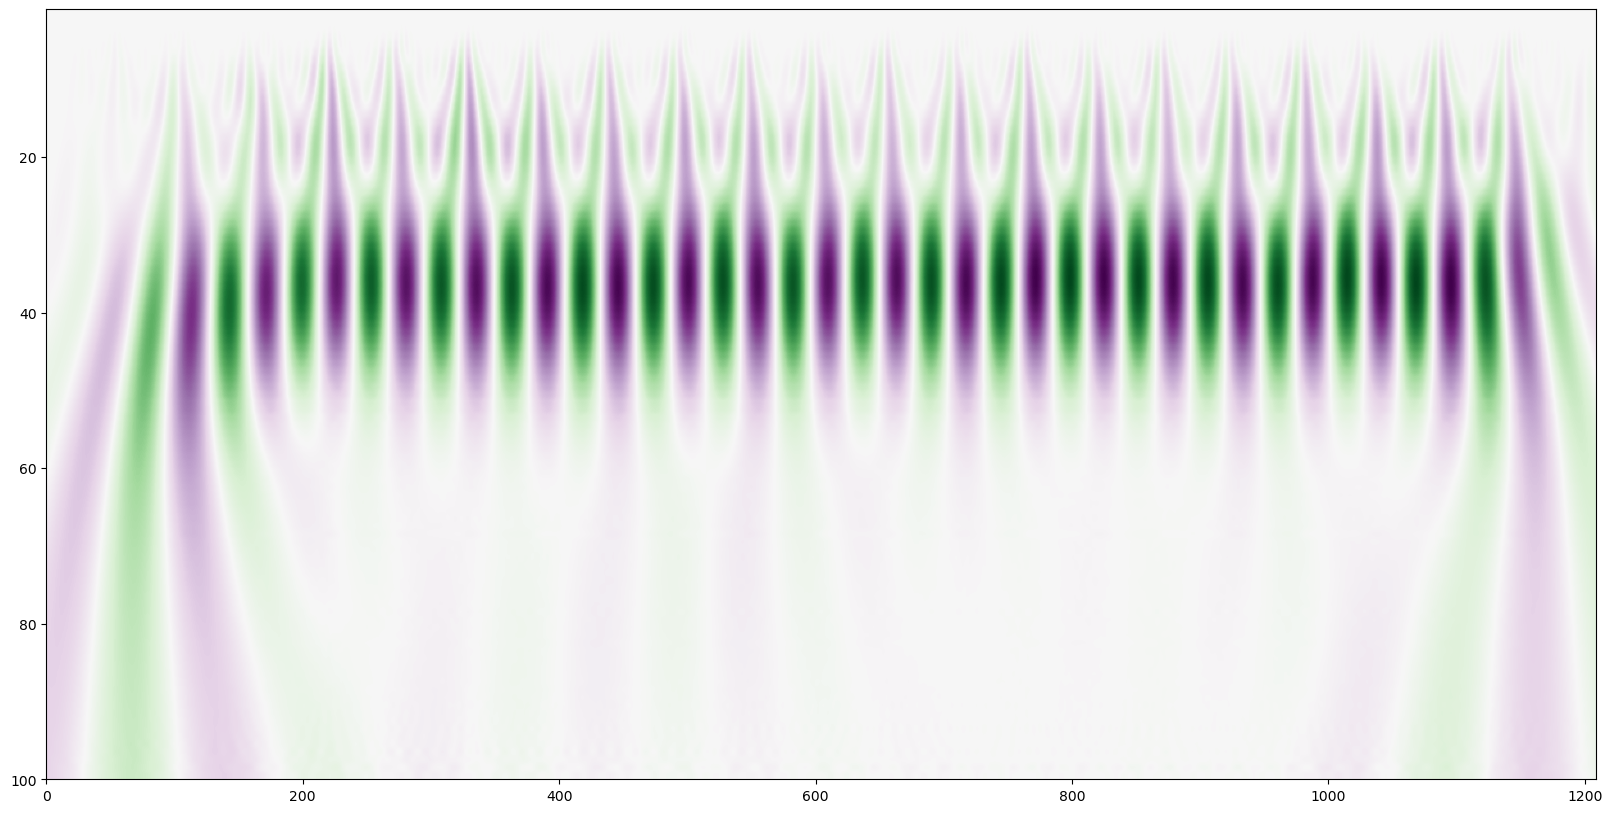

In [14]:
#CWT raw signal / Gausian filter 
Gaus_accelz_shift = Gaus_accelz - (np.mean(Gaus_accelz))
widths = np.arange(1, 100)
#cwt accelz
plt.figure(figsize=(20, 10))
cwtmatr_accelz_gaus, freqs = pywt.cwt(Gaus_accelz_shift, widths, 'gaus8')
plt.imshow(cwtmatr_accelz_gaus, extent=[0, len(Gaus_accelz), 100,1], cmap='PRGn', aspect='auto',
           vmax=abs(cwtmatr_accelz_gaus).max(), vmin=-abs(cwtmatr_accelz_gaus).max())  

plt.show() 

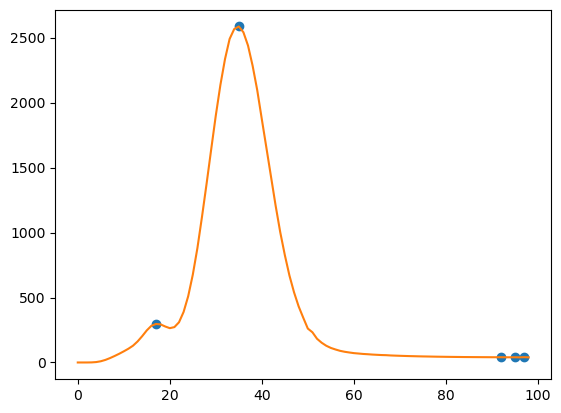

[17 35 92 95 97]


In [15]:
#energy - raw signal /Gausian filter
#accelz
E_accelz_gaus = np.zeros(len(widths))


for i in range(len(widths)):
    for j in range(len(accelz)):
        E_accelz_gaus[i]+=(cwtmatr_accelz_gaus[i][j])**2
            


peakind_E_accelz_gaus, _ = signal.find_peaks(E_accelz_gaus)
plt.plot(peakind_E_accelz_gaus , E_accelz_gaus[peakind_E_accelz_gaus] ,'o', E_accelz_gaus)
plt.show()
print(peakind_E_accelz_gaus)

In [18]:
# peaks Finding
F = 35
I = 17 #round(L/2) in case it did not found two scales
# peaks from accelz gause
data_accelz_gaus = cwtmatr_accelz_gaus[I]
peak_scale_I , _ = signal.find_peaks((data_accelz_gaus))
data2_accelz_gaus = cwtmatr_accelz_gaus[F]
peak2_accelz_gaus, _ = signal.find_peaks((data2_accelz_gaus))
peak_scale_F, _ = signal.find_peaks(-(data2_accelz_gaus))

In [27]:
# IC and FC frequency
dt = 0.01  # 100 Hz sampling
frequencies_F = pywt.scale2frequency('gaus8', F) / dt
frequencies_I = pywt.scale2frequency('gaus8', I) / dt
print('FC frequency: ' ,frequencies_F)
print('IC frequency: ' ,frequencies_I)

FC frequency:  1.7142857142857144
IC frequency:  3.5294117647058822


In [20]:
#plot
fig = go.Figure()

fig.add_trace(go.Scatter(x= peak_scale_F,
                 y=Gaus_accelz_shift[peak_scale_F],
                         mode='markers',
            name = 'peak_scale_F'
            ))

fig.add_trace(go.Scatter(x=peak_scale_I,
                 y=Gaus_accelz_shift[peak_scale_I],
                         mode='markers',
            name = 'peak_scale_I'
            ))

fig.add_trace(go.Scatter(
            y = Gaus_accelz_shift,
            line =  dict(shape =  'spline' ),
            name = 'Gaus_accelz'
            ))
fig.add_trace(go.Scatter(
            y = data2_accelz_gaus,
            line =  dict(shape =  'spline' ),
            name = 'scale F'
            ))
fig.add_trace(go.Scatter(
            y = data_accelz_gaus,
            line =  dict(shape =  'spline' ),
            name = 'scale I'
            ))

fig.show()


# IC and FC detection

In [21]:
#IC and FC detection
Event = pd.DataFrame(columns=['R/L', 'IC' , 'FC'])
R = pd.DataFrame(columns=[ 'R_IC' , 'R_FC'])
L = pd.DataFrame(columns=[ 'L_IC' , 'L_FC'])
m=0
for i in range(len(peak_scale_F)-1):
    M = np.zeros(len(peak_scale_I)).astype(int)
    j=0
    for n in range(len(peak_scale_I)):
        if (peak_scale_I[n] < peak_scale_F[i+1]) & (peak_scale_I[n] > peak_scale_F[i]) :
            M[j] = peak_scale_I[n]
            j = j+1 
    M = np.trim_zeros(M, trim='b')
    if M.size == 0:
        break
    elif Gaus_angular_velz[M[-1]] > 0:
        Event = Event.append({'R/L': 'R' ,'IC': M[-1] ,'FC': peak_scale_F[i]   }, ignore_index=True)
        R = R.append({'R_IC': M[-1] ,'R_FC': peak_scale_F[i]   }, ignore_index=True)
    else:
        Event = Event.append({'R/L': 'L' ,'IC': M[-1] ,'FC': peak_scale_F[i]  }, ignore_index=True)
        L = L.append({'L_IC': M[-1] ,'L_FC': peak_scale_F[i]  }, ignore_index=True)
        
        
#save the output   
#Event.to_csv(r'F:\uni\M\ms\project\output'+'\\'+'event_walk'+'.csv')         
(Event)   

C:\Users\acer\AppData\Local\Temp\ipykernel_32604\3937229408.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\acer\AppData\Local\Temp\ipykernel_32604\3937229408.py:18: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\acer\AppData\Local\Temp\ipykernel_32604\3937229408.py:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\acer\AppData\Local\Temp\ipykernel_32604\3937229408.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\acer\AppData\Local\Temp\ipykernel_32604\3937229408.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

R/L    IC    FC
0    R    96    55
1    L   155   114
2    R   210   171
3    L   264   226
4    R   318   280
5    L   374   335
6    R   428   391
7    L   484   446
8    R   538   501
9    L   593   555
10   R   646   609
11   L   700   663
12   R   754   717
13   L   808   771
14   R   862   825
15   L   915   879
16   R   971   933
17   L  1024   988
18   R  1079  1041
19   L  1132  1095
20   R  1183  1149

In [22]:
fig = go.Figure()

fig.add_trace(go.Scatter(x= Event['IC'],
                 y=Gaus_accelz[Event['IC'].astype(int)],
                         mode='markers',
            name = 'Event[IC]'
            ))
fig.add_trace(go.Scatter(x=Event['FC'],
                 y=Gaus_accelz[Event['FC'].astype(int)],
                         mode='markers',
            name = 'Event[FC] '
            ))


# Add shape regions
l = len(R['R_IC'])
for i in range(l):
    fig.add_vrect(
        x0=R['R_IC'][i], x1=R['R_FC'][i],
        fillcolor="LightSalmon", opacity=0.5,
        layer="below", line_width=0,
    )
# Add shape regions
l = len(L['L_IC'])
for i in range(l):
    fig.add_vrect(
        x0=L['L_IC'][i], x1=L['L_FC'][i],
        fillcolor="Lightblue", opacity=0.5,
        layer="below", line_width=0,
    )

fig.add_trace(go.Scatter(
            y = Gaus_accelz,
            line =  dict(shape =  'spline' ),
            name = 'Gaus_accelz'
            ))

fig.show()

fig = go.Figure()

fig.add_trace(go.Scatter(x= Event['IC'],
                 y=Gaus_accely[Event['IC'].astype(int)],
                         mode='markers',
            name = 'Event[IC]'
            ))
fig.add_trace(go.Scatter(x=Event['FC'],
                 y=Gaus_accely[Event['FC'].astype(int)],
                         mode='markers',
            name = 'Event[FC] '
            ))


# Add shape regions
l = len(R['R_IC'])
for i in range(l):
    fig.add_vrect(
        x0=R['R_IC'][i], x1=R['R_FC'][i],
        fillcolor="LightSalmon", opacity=0.5,
        layer="below", line_width=0,
    )
# Add shape regions
l = len(L['L_IC'])
for i in range(l):
    fig.add_vrect(
        x0=L['L_IC'][i], x1=L['L_FC'][i],
        fillcolor="Lightblue", opacity=0.5,
        layer="below", line_width=0,
    )

fig.add_trace(go.Scatter(
            y = Gaus_accely,
            line =  dict(shape =  'spline' ),
            name = 'Gaus_accely'
            ))

fig.show()

fig = go.Figure()

fig.add_trace(go.Scatter(x= Event['IC'],
                 y=Gaus_angular_vely[Event['IC'].astype(int)],
                         mode='markers',
            name = 'Event[IC]'
            ))
fig.add_trace(go.Scatter(x=Event['FC'],
                 y=Gaus_angular_vely[Event['FC'].astype(int)],
                         mode='markers',
            name = 'Event[FC] '
            ))


# Add shape regions
l = len(R['R_IC'])
for i in range(l):
    fig.add_vrect(
        x0=R['R_IC'][i], x1=R['R_FC'][i],
        fillcolor="LightSalmon", opacity=0.5,
        layer="below", line_width=0,
    )
# Add shape regions
l = len(L['L_IC'])
for i in range(l):
    fig.add_vrect(
        x0=L['L_IC'][i], x1=L['L_FC'][i],
        fillcolor="Lightblue", opacity=0.5,
        layer="below", line_width=0,
    )

fig.add_trace(go.Scatter(
            y = Gaus_angular_vely,
            line =  dict(shape =  'spline' ),
            name = 'Gaus_angular_vely'
            ))

fig.show()

fig = go.Figure()

fig.add_trace(go.Scatter(x= Event['IC'],
                 y=eulery[Event['IC'].astype(int)],
                         mode='markers',
            name = 'Event[IC]'
            ))
fig.add_trace(go.Scatter(x=Event['FC'],
                 y=eulery[Event['FC'].astype(int)],
                         mode='markers',
            name = 'Event[FC] '
            ))


# Add shape regions
l = len(R['R_IC'])
for i in range(l):
    fig.add_vrect(
        x0=R['R_IC'][i], x1=R['R_FC'][i],
        fillcolor="LightSalmon", opacity=0.5,
        layer="below", line_width=0,
    )
# Add shape regions
l = len(L['L_IC'])
for i in range(l):
    fig.add_vrect(
        x0=L['L_IC'][i], x1=L['L_FC'][i],
        fillcolor="Lightblue", opacity=0.5,
        layer="below", line_width=0,
    )

fig.add_trace(go.Scatter(
            y = eulery,
            line =  dict(shape =  'spline' ),
            name = 'eulery'
            ))

fig.show()

fig = go.Figure()

fig.add_trace(go.Scatter(x= Event['IC'],
                 y=eulerx[Event['IC'].astype(int)],
                         mode='markers',
            name = 'Event[IC]'
            ))
fig.add_trace(go.Scatter(x=Event['FC'],
                 y=eulerx[Event['FC'].astype(int)],
                         mode='markers',
            name = 'Event[FC] '
            ))


# Add shape regions
l = len(R['R_IC'])
for i in range(l):
    fig.add_vrect(
        x0=R['R_IC'][i], x1=R['R_FC'][i],
        fillcolor="LightSalmon", opacity=0.5,
        layer="below", line_width=0,
    )
# Add shape regions
l = len(L['L_IC'])
for i in range(l):
    fig.add_vrect(
        x0=L['L_IC'][i], x1=L['L_FC'][i],
        fillcolor="Lightblue", opacity=0.5,
        layer="below", line_width=0,
    )

fig.add_trace(go.Scatter(
            y = eulerx,
            line =  dict(shape =  'spline' ),
            name = 'eulerx'
            ))

fig.show()
fig = go.Figure()

fig.add_trace(go.Scatter(x= Event['IC'],
                 y=eulerz[Event['IC'].astype(int)],
                         mode='markers',
            name = 'Event[IC]'
            ))
fig.add_trace(go.Scatter(x=Event['FC'],
                 y=eulerz[Event['FC'].astype(int)],
                         mode='markers',
            name = 'Event[FC] '
            ))


# Add shape regions
l = len(R['R_IC'])
for i in range(l):
    fig.add_vrect(
        x0=R['R_IC'][i], x1=R['R_FC'][i],
        fillcolor="LightSalmon", opacity=0.5,
        layer="below", line_width=0,
    )
# Add shape regions
l = len(L['L_IC'])
for i in range(l):
    fig.add_vrect(
        x0=L['L_IC'][i], x1=L['L_FC'][i],
        fillcolor="Lightblue", opacity=0.5,
        layer="below", line_width=0,
    )

fig.add_trace(go.Scatter(
            y = eulerz,
            line =  dict(shape =  'spline' ),
            name = 'eulerz'
            ))

fig.show()

#fig.write_html("E:/uni/M/ms/project/step.html")

# Rotation

In [30]:
#rotating Acc nd Gyro
#Rotation matrix from quaternion
from scipy.spatial.transform import Rotation as Ro
accel_rot =np.zeros([3,len(t)])
gyro_rot =np.zeros([3,len(t)])

for i in range(len(t)):
    r=[]
    ekf=[]
    r = Ro.from_quat(Quat_array[i])
    r.as_quat()    
    #r.as_rotvec()
    #it seems .tolist() is not needed
    v = (acc_arrey[i]).tolist()
    g = (gyr_arrey[i]).tolist()
    accel_rot[:,i] = r.apply(v)
    gyro_rot[:,i]  = r.apply(g)
    
    
accelx_rot = accel_rot[0,:]
accely_rot = accel_rot[1,:]
accelz_rot = accel_rot[2,:]

angular_velx_rot = gyro_rot[0,:]
angular_vely_rot = gyro_rot[1,:]
angular_velz_rot = gyro_rot[2,:]


In [32]:
# plot Rotated vector va non rotated
fig = go.Figure()
fig.add_trace(go.Scatter(
            y = accelz_rot,
            line =  dict(shape =  'spline' ),
            name = 'accelz_rot'
            ))
fig.add_trace(go.Scatter(
            y = accelz,
            line =  dict(shape =  'spline' ),
            name = 'accelz'
            ))
fig.show()

# Jerk

In [33]:
#derivative function

def D(xlist , ylist):
    yprime = np.diff(ylist)/np.diff(xlist)
    xprime = []
    for i in range(len(yprime)):
        xtemp = (xlist[i+1] + xlist[i])/2
        xprime = np.append(xprime , xtemp)
    return xprime , yprime


In [34]:
############jerk raw signal
tjerk , jerk_accelz = D(t , accelz)
tjerk , jerk_accely = D(t , accely)
tjerk , jerk_accelx = D(t , accelx)

tjerk , jerk_linaccelz = D(t , linaccelz)
tjerk , jerk_linaccely = D(t , linaccely)
tjerk , jerk_linaccelx = D(t , linaccelx)

tjerk , jerk_angular_velx = D(t , angular_velx)
tjerk , jerk_angular_vely = D(t , angular_vely)
tjerk , jerk_angular_velz = D(t , angular_velz)

#jerk rot signal
tjerk , jerk_accelx_rot = D(t , accelx_rot)
tjerk , jerk_accely_rot = D(t , accely_rot)
tjerk , jerk_accelz_rot = D(t , accelz_rot)

tjerk , jerk_angular_velx_rot = D(t , angular_velx_rot)
tjerk , jerk_angular_vely_rot = D(t , angular_vely_rot)
tjerk , jerk_angular_velz_rot = D(t , angular_velz_rot)



########## jerf filtered data

tjerk , jerk_accelz_Gaus = D(t , Gaus_accelz)
tjerk , jerk_accely_Gaus = D(t , Gaus_accely)
tjerk , jerk_accelx_Gaus = D(t , Gaus_accelx)

tjerk , jerk_linaccelz_Gaus = D(t , Gaus_linaccelz)
tjerk , jerk_linaccely_Gaus = D(t , Gaus_linaccely)
tjerk , jerk_linaccelx_Gaus = D(t , Gaus_linaccelx)

tjerk , jerk_angular_velx_Gaus = D(t , Gaus_angular_velx)
tjerk , jerk_angular_vely_Gaus = D(t , Gaus_angular_vely)
tjerk , jerk_angular_velz_Gaus = D(t , Gaus_angular_velz)



In [35]:
# plot jerk vector vs accel
fig = go.Figure()
fig.add_trace(go.Scatter(
            y = Gaus_accelz,
            line =  dict(shape =  'spline' ),
            name = 'Gaus_accelz'
            ))
fig.add_trace(go.Scatter(
            y = jerk_accelz_Gaus,
            line =  dict(shape =  'spline' ),
            name = 'jerk_accelz_Gaus'
            ))
fig.show()

fig = go.Figure()

fig.add_trace(go.Scatter(x= Event['IC'],
                 y=jerk_accelz_Gaus[Event['IC'].astype(int)],
                         mode='markers',
            name = 'Event[IC]'
            ))
fig.add_trace(go.Scatter(x=Event['FC'],
                 y=jerk_accelz_Gaus[Event['FC'].astype(int)],
                         mode='markers',
            name = 'Event[FC] '
            ))


# Add shape regions
l = len(R['R_IC'])
for i in range(l):
    fig.add_vrect(
        x0=R['R_IC'][i], x1=R['R_FC'][i],
        fillcolor="LightSalmon", opacity=0.5,
        layer="below", line_width=0,
    )
# Add shape regions
l = len(L['L_IC'])
for i in range(l):
    fig.add_vrect(
        x0=L['L_IC'][i], x1=L['L_FC'][i],
        fillcolor="Lightblue", opacity=0.5,
        layer="below", line_width=0,
    )

fig.add_trace(go.Scatter(
            y = jerk_accelz_Gaus,
            line =  dict(shape =  'spline' ),
            name = 'jerk_accelz_Gaus'
            ))

fig.show()


# Interpolate

In [36]:
inter_R = pd.DataFrame()
m = round(np.mean(R['R_IC'] - R['R_FC']))
interpolated_data = {}

for i in range(len(R['R_IC'])):
    x = np.array(t[R['R_FC'][i]:R['R_IC'][i]])
    y = np.array(Gaus_accelz[R['R_FC'][i]:R['R_IC'][i]])
    # Interpolation
    interp_func = interp1d
    interp_func1 = interp_func(x, y, kind='linear', bounds_error=False, fill_value="extrapolate")
    new_x = np.linspace(min(x), max(y), m)  # New x-coordinates for interpolation
    interpolated_data[f'Array {i+1}']= interp_func1(new_x)

# Create a DataFrame
inter_L = pd.DataFrame(interpolated_data) 

inter_L = pd.DataFrame()
m = round(np.mean(L['L_IC'] - L['L_FC']))
interpolated_data = {}

for i in range(len(L['L_IC'])):
    x = np.array(t[L['L_FC'][i]:L['L_IC'][i]])
    y = np.array(Gaus_accelz[L['L_FC'][i]:L['L_IC'][i]])
    # Interpolation
    interp_func = interp1d
    interp_func1 = interp_func(x, y, kind='linear', bounds_error=False, fill_value="extrapolate")
    new_x = np.linspace(min(x), max(y), m)  # New x-coordinates for interpolation
    interpolated_data[f'Array {i+1}']= interp_func1(new_x)

# Create a DataFrame
inter_L = pd.DataFrame(interpolated_data)   

In [37]:
fig = go.Figure()
fig.add_trace(go.Scatter(
            y = inter_L['Array 6'],
            line =  dict(shape =  'spline' ),
            name = 'inter_L[Array 6]'
            ))
fig.add_trace(go.Scatter(
            y = Gaus_accelz[R['R_FC'][5]:R['R_IC'][5]],
            line =  dict(shape =  'spline' ),
            name = 'jerk_accelz_Gaus'
            ))
fig.show()